### Grover's Algorithm

opisac troche co robi,
ustalic jezyk opisow

Algorytm Grovera pozwala na zmniejszenie czasu wyszukiwania poprzez zmniejszenie rzędu złożoności obliczeniowej z $O(N)$ aż do $O(\sqrt N)$ 

In [ ]:
from openql import openql as ql
import hisplot as hp
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
rootDir = os.path.dirname(os.path.realpath("grover-2q.ipynb"))
curdir = os.path.dirname("grover-2q.ipynb")
output_dir = os.path.join(curdir, 'grover-2q_output')
num_qubits = 2

In [ ]:
ql.set_option('output_dir', output_dir)

platform = ql.Platform('platform', 'none')
kernel = ql.Kernel('grover_kernel', platform, num_qubits)
program = ql.Program('grover', platform, num_qubits)


Initializing

In [ ]:
kernel.hadamard(0)
kernel.hadamard(1)

Choosing state |11⟩ to be a winner (Oracle)

In [ ]:
kernel.cz(0, 1)

Diffuser

In [ ]:
kernel.hadamard(0)
kernel.hadamard(1)

kernel.z(0)
kernel.z(1)

kernel.cz(0, 1)

kernel.hadamard(0)
kernel.hadamard(1)

Measurement

In [ ]:
kernel.measure(0)
kernel.measure(1)

In [ ]:
program.add_kernel(kernel)
program.compile()


Simulation

In [ ]:
import qxelarator
from functools import reduce

qx = qxelarator.QX()
qx.set('grover-2q_output/grover.qasm')

ntests = 1000
results = []

for i in range(ntests):
    qx.execute()
    res = [int(qx.get_measurement_outcome(q)) for q in range(num_qubits)]
    result = reduce(lambda x, y: x + str(y), res, "|") + "⟩"
    results.append(result)
    

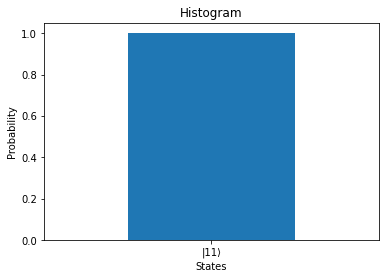

In [ ]:
hp.plot_histogram(results)

Wniosek

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ee9a0e1-5142-4a5e-b221-8d22021093a4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>